# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 15.2 MB 30.7 MB/s 
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


# Google Drive connection

In [ ]:
#Execute the cell and follow the steps, it is necessary to connect with the user account in which the files are contained.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import statements

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

## Notebook Presentation

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [ ]:
df_hh_income = pd.read_csv('Your path/Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Your path/Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Your path/Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Your path/Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Your path/Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

## Median Household Income

In [ ]:
df_hh_income.shape

(29322, 3)

In [ ]:
print(f"Dataframe has {df_hh_income.shape[0]} rows and {df_hh_income.shape[1]} columns")

Dataframe has 29322 rows and 3 columns


In [ ]:
df_hh_income.columns

Index(['Geographic Area', 'City', 'Median Income'], dtype='object')

In [ ]:
# examine the data types
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [ ]:
df_hh_income.head()

,Geographic Area,City,Median Income
0,AL,Abanda CDP,11207
1,AL,Abbeville city,25615
2,AL,Adamsville city,42575
3,AL,Addison town,37083
4,AL,Akron town,21667


In [ ]:
df_hh_income.tail()

,Geographic Area,City,Median Income
29317,WY,Woods Landing-Jelm CDP,NaN
29318,WY,Worland city,41523
29319,WY,Wright town,77114
29320,WY,Yoder town,37500
29321,WY,Y-O Ranch CDP,NaN


## Poverty Percentage

In [ ]:
df_pct_poverty.shape

(29329, 3)

In [ ]:
print(f"Dataframe has {df_pct_poverty.shape[0]} rows and {df_pct_poverty.shape[1]} columns")

Dataframe has 29329 rows and 3 columns


In [ ]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [ ]:
# examine the data types
df_pct_poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
df_pct_poverty.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [ ]:
df_pct_poverty.tail()

,Geographic Area,City,poverty_rate
29324,WY,Woods Landing-Jelm CDP,18.6
29325,WY,Worland city,15.3
29326,WY,Wright town,5.9
29327,WY,Yoder town,5.4
29328,WY,Y-O Ranch CDP,0


## Pct Over 25 Completed High School

In [ ]:
df_pct_completed_hs.shape

(29329, 3)

In [ ]:
print(f"Dataframe has {df_pct_completed_hs.shape[0]} rows and {df_pct_completed_hs.shape[1]} columns")

Dataframe has 29329 rows and 3 columns


In [ ]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [ ]:
# examine the data types
df_pct_completed_hs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Geographic Area       29329 non-null  object
 1   City                  29329 non-null  object
 2   percent_completed_hs  29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


In [ ]:
df_pct_completed_hs.head()

,Geographic Area,City,percent_completed_hs
0,AL,Abanda CDP,21.2
1,AL,Abbeville city,69.1
2,AL,Adamsville city,78.9
3,AL,Addison town,81.4
4,AL,Akron town,68.6


In [ ]:
df_pct_completed_hs.tail()

,Geographic Area,City,percent_completed_hs
29324,WY,Woods Landing-Jelm CDP,100
29325,WY,Worland city,85.6
29326,WY,Wright town,89.2
29327,WY,Yoder town,79.4
29328,WY,Y-O Ranch CDP,100


## Share of Race By City

In [ ]:
df_share_race_city.shape

(29268, 7)

In [ ]:
print(f"Dataframe has {df_share_race_city.shape[0]} rows and {df_share_race_city.shape[1]} columns")

Dataframe has 29268 rows and 7 columns


In [ ]:
df_share_race_city.columns

Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [ ]:
# examine the data types
df_share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [ ]:
df_share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0,0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0,0.1,0.4
4,AL,Akron town,13.2,86.5,0,0,0.3


In [ ]:
df_share_race_city.tail()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
29263,WY,Woods Landing-Jelm CDP,95.9,0,0,2.1,0
29264,WY,Worland city,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright town,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder town,97.4,0,0,0,4
29267,WY,Y-O Ranch CDP,92.8,1.5,2.6,0,11.8


## Deaths by Police US

In [ ]:
df_fatalities.shape

(2535, 14)

In [ ]:
print(f"Dataframe has {df_fatalities.shape[0]} rows and {df_fatalities.shape[1]} columns")

Dataframe has 2535 rows and 14 columns


In [ ]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
# examine the data types
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
df_fatalities.tail()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True
2534,2815,Dwayne Jeune,31/07/17,shot,knife,32.00,M,B,Brooklyn,NY,True,attack,Not fleeing,False


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
#info() allows us to see the count of non-null data in each column of the data frame. 
df_hh_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29322 entries, 0 to 29321
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29322 non-null  object
 1   City             29322 non-null  object
 2   Median Income    29271 non-null  object
dtypes: object(3)
memory usage: 687.4+ KB


In [ ]:
df_hh_income.fillna(0, inplace=True)
print(f'Duplicated values in data?: {df_hh_income.duplicated().values.any()}')
print(f'Missing values in data?: {df_hh_income.isna().values.any()}')

Duplicated values in data?: False
Missing values in data?: False


In [ ]:
#info() allows us to see the count of non-null data in each column of the data frame. 
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [ ]:
df_fatalities.dropna(inplace=True)
print(f'Missing values in data?: {df_fatalities.isna().values.any()}')
print(f'Duplicated values in data?: {df_fatalities.duplicated().values.any()}')

Missing values in data?: False
Duplicated values in data?: False


# Data Type Conversions

In [ ]:
# converting 'age' from float to int and date to datetime type.
df_fatalities['age'] = df_fatalities['age'].astype(int)
df_fatalities['date'] = pd.to_datetime(df_fatalities['date'], errors='coerce')
df_fatalities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2254 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       2254 non-null   int64         
 1   name                     2254 non-null   object        
 2   date                     2254 non-null   datetime64[ns]
 3   manner_of_death          2254 non-null   object        
 4   armed                    2254 non-null   object        
 5   age                      2254 non-null   int64         
 6   gender                   2254 non-null   object        
 7   race                     2254 non-null   object        
 8   city                     2254 non-null   object        
 9   state                    2254 non-null   object        
 10  signs_of_mental_illness  2254 non-null   bool          
 11  threat_level             2254 non-null   object        
 12  flee                     2254 non-

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
df_pct_poverty.columns

Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')

In [ ]:
type(df_pct_poverty['poverty_rate'][0])

str

In [ ]:
#Converting poverty_rate column to float
df_pct_poverty['poverty_rate'] = pd.to_numeric(df_pct_poverty['poverty_rate'], errors='coerce')
#Checking data type.
type(df_pct_poverty['poverty_rate'][0])

numpy.float64

In [ ]:
#Adding a new columns with country recurrence counts.
Poverty_Rate_by_State =  df_pct_poverty.groupby(['Geographic Area'], as_index=False).agg({'poverty_rate': pd.Series.mean})
Poverty_Rate_by_State.head()

,Geographic Area,poverty_rate
0,AK,19.85
1,AL,20.65
2,AR,22.96
3,AZ,25.67
4,CA,17.12


In [ ]:
bar = px.bar(Poverty_Rate_by_State, x ='Geographic Area', 
             y ='poverty_rate',
             color='Geographic Area')
bar.update_layout(title='Poverty Rate in each US State', xaxis_title='US State', xaxis={'categoryorder':'min descending'}, 
                  yaxis_title='Poverty Rate', yaxis=dict(type='log'))

# hiding legend 
bar.update_traces(showlegend=False)

bar.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
df_pct_completed_hs.columns

Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')

In [ ]:
type(df_pct_completed_hs['percent_completed_hs'][0])

str

In [ ]:
#Converting poverty_rate column to float
df_pct_completed_hs['percent_completed_hs'] = pd.to_numeric(df_pct_completed_hs['percent_completed_hs'], errors='coerce')
#Checking data type.
type(df_pct_completed_hs['percent_completed_hs'][0])

numpy.float64

In [ ]:
#Adding a new columns with country recurrence counts.
HS_Graduation_Rate_by_State =  df_pct_completed_hs.groupby(['Geographic Area'], as_index=False).agg({'percent_completed_hs': pd.Series.mean})
HS_Graduation_Rate_by_State.sort_values('percent_completed_hs', ascending=False, inplace=True)
HS_Graduation_Rate_by_State.head()

,Geographic Area,percent_completed_hs
19,MA,92.40
50,WY,92.10
11,HI,91.67
44,UT,91.62
6,CT,91.59


In [ ]:
bar = px.bar(HS_Graduation_Rate_by_State, x ='Geographic Area', 
             y ='percent_completed_hs',
             color_continuous_scale="Aggrnyl")
bar.update_layout(title='High School Graduation Rate in each US State', xaxis_title='US State', xaxis={'categoryorder':'min descending'}, 
                  yaxis_title='High School Graduation Rate', yaxis=dict(type='log'))

bar.show()

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
#Using .merge() to join both percentajes by State.
Povetry_and_Graduation_Rate = Poverty_Rate_by_State.merge(HS_Graduation_Rate_by_State, how='inner', on='Geographic Area')
Povetry_and_Graduation_Rate.sort_values('percent_completed_hs', ascending=True, inplace=True)
#Povetry_and_Graduation_Rate.head()

In [ ]:
Povetry_and_Graduation_Rate['Geographic Area'].iloc[-1]

'MA'

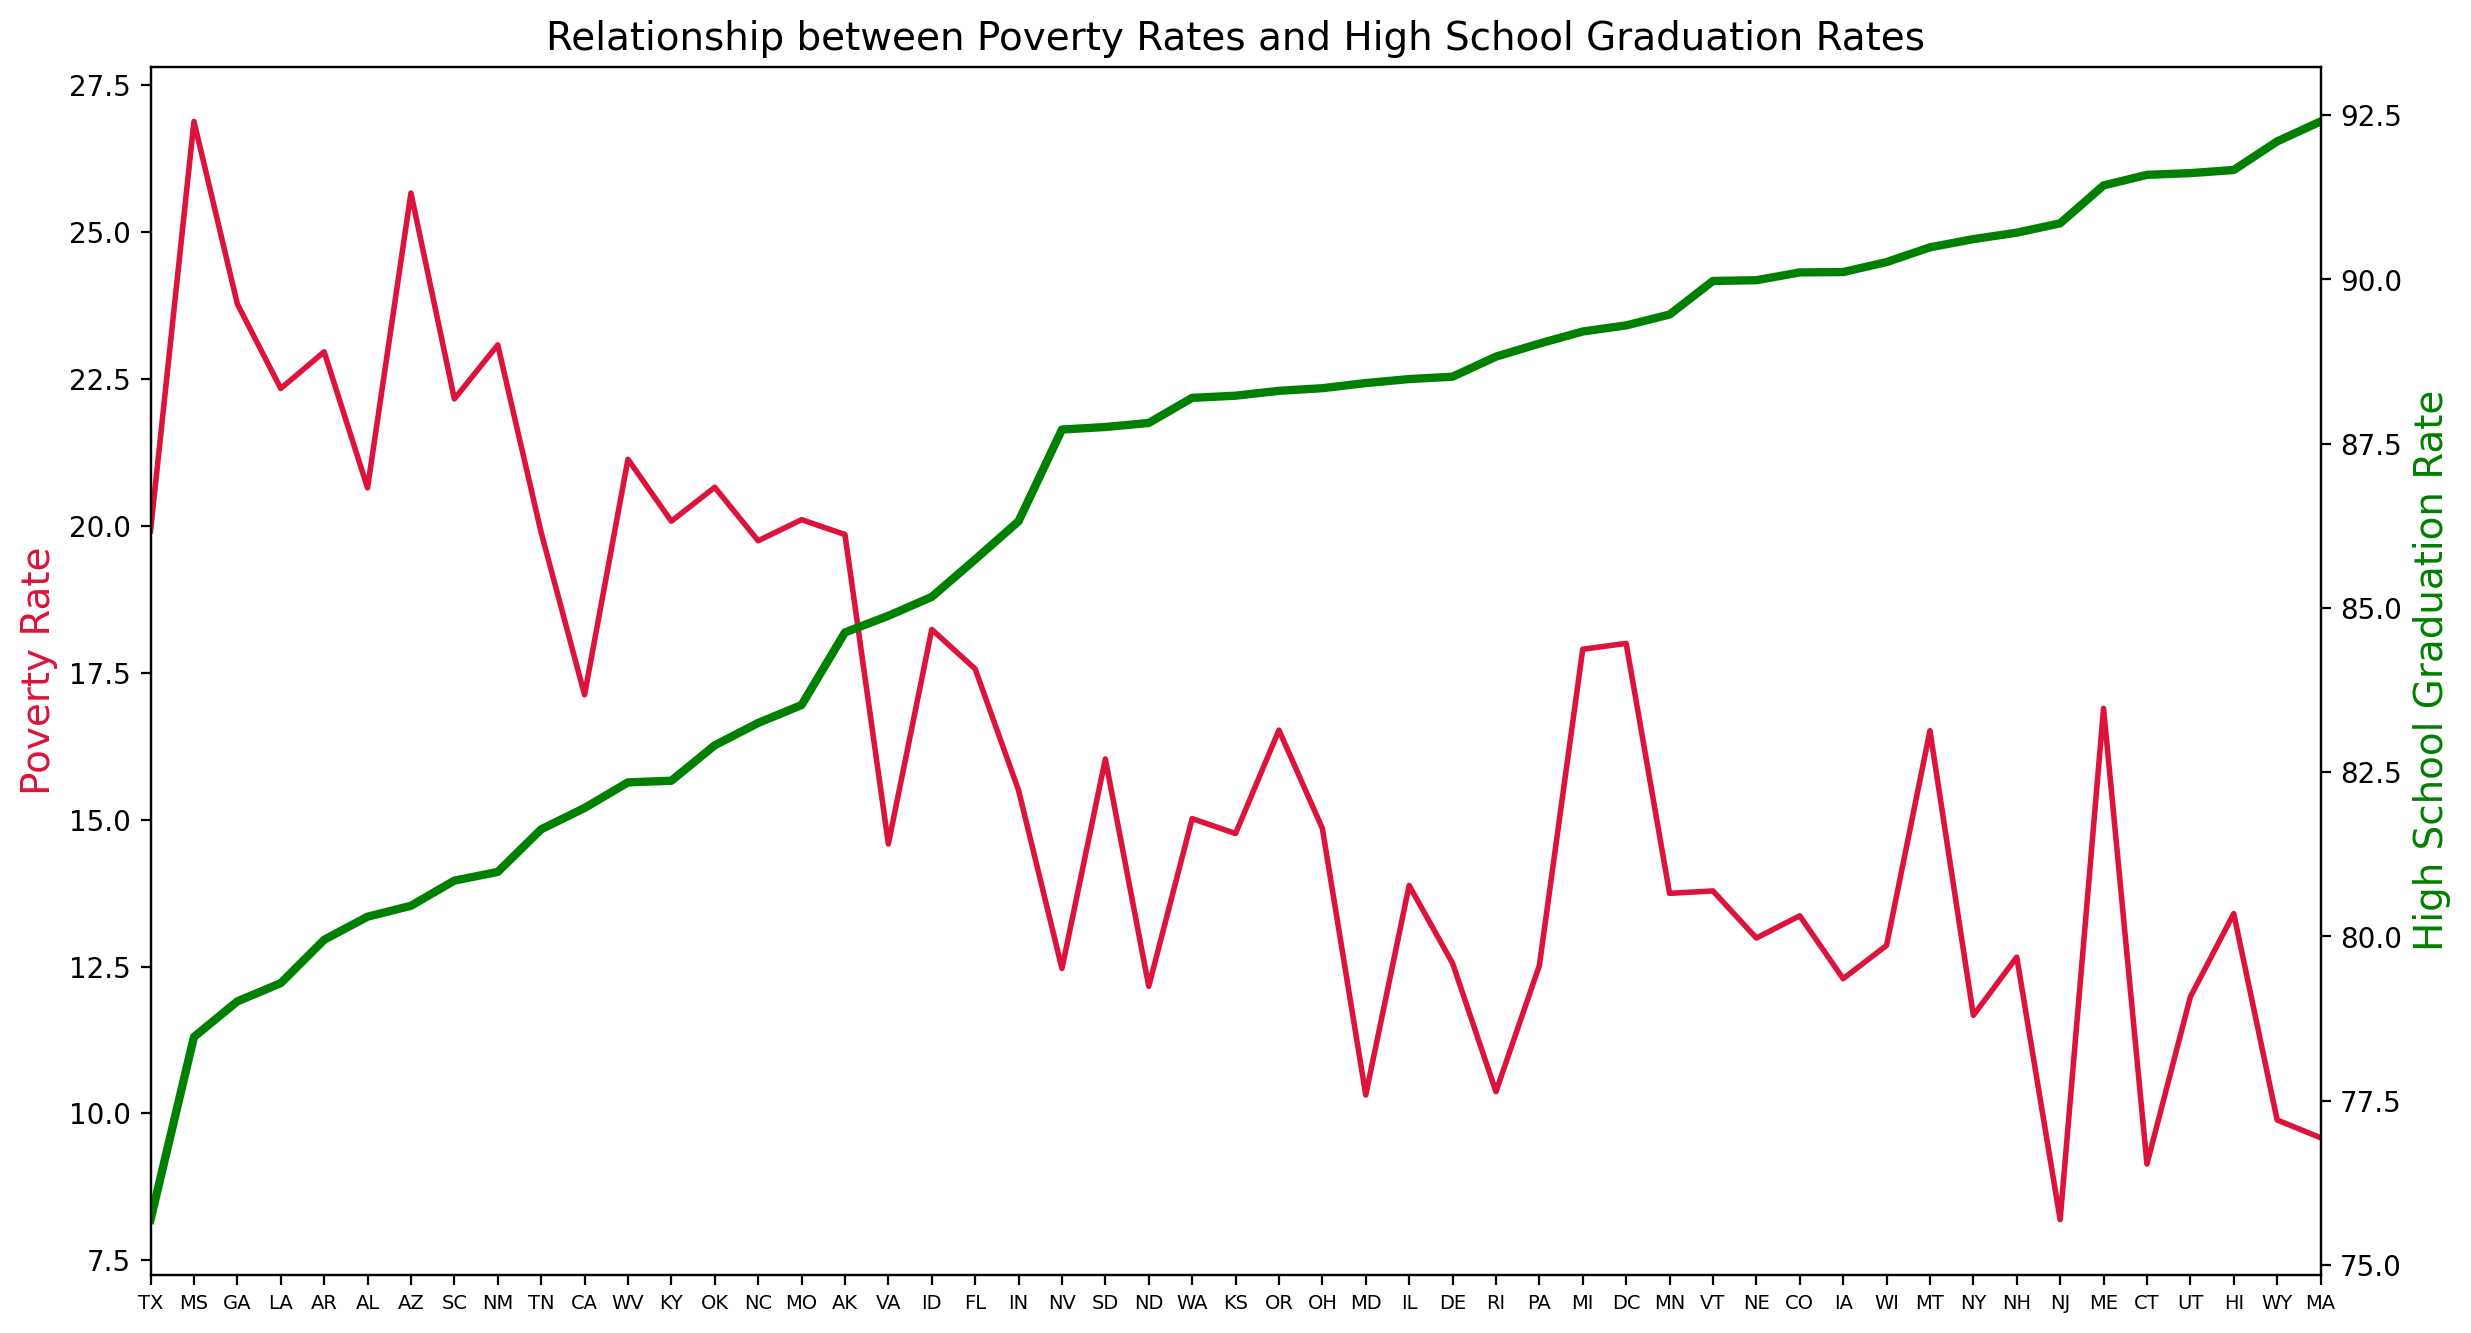

In [ ]:
# We need to be able to configure and plot our data on two separate axes on the same chart. 
# This involves getting hold of an axis object from Matplotlib.
plt.figure(figsize=(14,8), dpi=200) 
# Rotate the text on the x-axis by 45 degrees. (rotation=45)
plt.xticks(fontsize=7)
plt.title("Relationship between Poverty Rates and High School Graduation Rates", fontsize=14)


ax1 = plt.gca() # get current axes
ax2 = ax1.twinx() # get antoher axis that shares the same x-axis.
# We then create another axis object: ax2. The key thing is that by using the .twinx() method allows ax1 and ax2 to share the same x-axis. 
# When we plot our data on the axes objects we get this:
#Make the lines on the chart thicker (linewidth)
#Adding labels
ax1.set_ylabel('Poverty Rate', fontsize=14, color="crimson")
ax2.set_ylabel('High School Graduation Rate', fontsize=14, color="green")


ax1.plot(Povetry_and_Graduation_Rate['Geographic Area'], Povetry_and_Graduation_Rate['poverty_rate'], color="crimson", linewidth=2)
ax2.plot(Povetry_and_Graduation_Rate['Geographic Area'], Povetry_and_Graduation_Rate['percent_completed_hs'], color="green", linewidth=3)

ax1.set_xlim(left=Povetry_and_Graduation_Rate['Geographic Area'].iloc[0], right=Povetry_and_Graduation_Rate['Geographic Area'].iloc[-1])

plt.show()

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

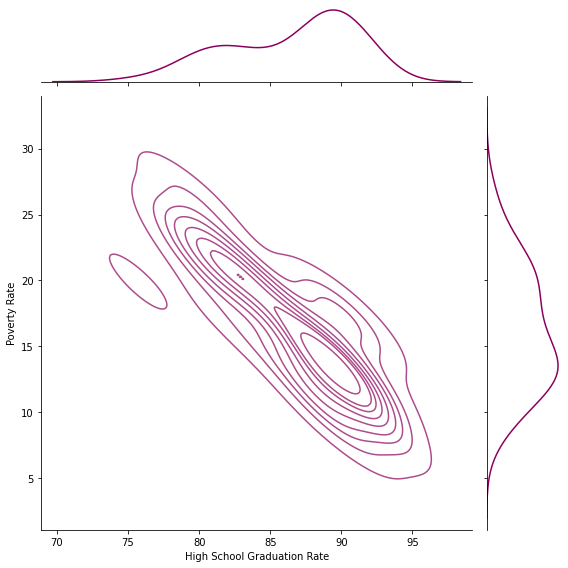

In [ ]:
join = sns.jointplot(data=Povetry_and_Graduation_Rate, 
                     x="percent_completed_hs", 
                     y="poverty_rate",
                     height=8,
                     kind='kde',
                     color='#8A005C',
                     joint_kws={'alpha':0.7}
                     )
#sns.jointplot returns a JointGrid object, which gives you access to the matplotlib axes and you can then manipulate from there.
join.set_axis_labels(ylabel='Poverty Rate', 
       xlabel='High School Graduation Rate')

# labels appear outside of plot area, so auto-adjust
join.figure.tight_layout() 

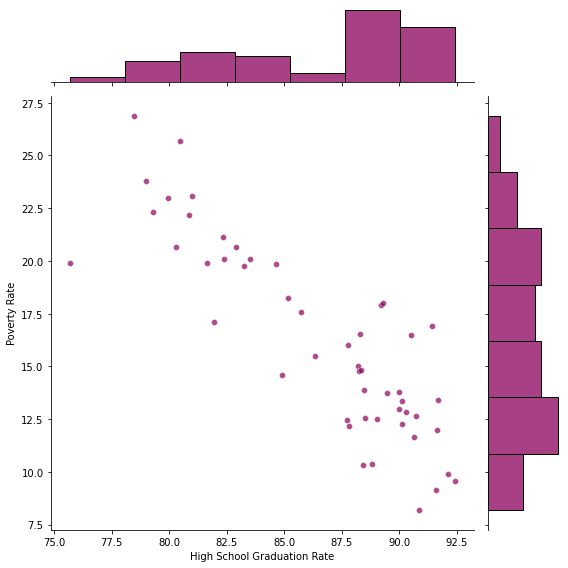

In [ ]:
join = sns.jointplot(data=Povetry_and_Graduation_Rate, 
                     x="percent_completed_hs", 
                     y="poverty_rate",
                     height=8,
                     kind='scatter',
                     color='#8A005C',
                     joint_kws={'alpha':0.7}
                     )
#sns.jointplot returns a JointGrid object, which gives you access to the matplotlib axes and you can then manipulate from there.
join.set_axis_labels(ylabel='Poverty Rate', 
       xlabel='High School Graduation Rate')

# labels appear outside of plot area, so auto-adjust
join.figure.tight_layout() 

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

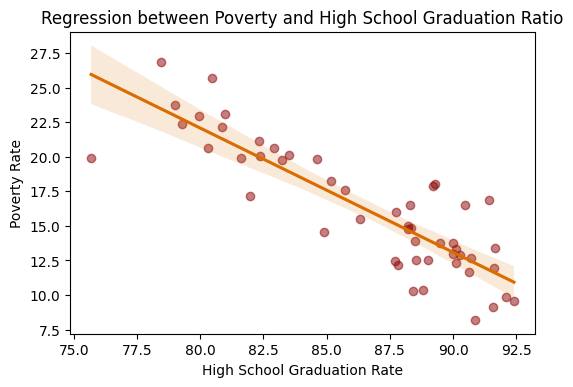

In [ ]:
plt.figure(figsize=(6,4), dpi=100)
ax = sns.regplot(data=Povetry_and_Graduation_Rate, 
                     x="percent_completed_hs", 
                     y="poverty_rate",
          scatter_kws = {'alpha': 0.5, 
                          'color': '#8A0002'},
          line_kws = {'color': '#DA6D00'})

ax.set(ylabel='Poverty Rate', 
       xlabel='High School Graduation Rate')
ax.set_title(r'Regression between Poverty and High School Graduation Ratio') 
 
plt.show()

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

<font color='yellow'>***Applying to_numeric for multiple columns***
- If you need to convert multiple columns to numeric dtypes - use the following technique:
</font>

In [ ]:
#Converting poverty_rate column to float
df_race_by_city = df_share_race_city.copy()
df_race_by_city[['share_white', 
                   'share_black',
                   'share_native_american', 
                   'share_asian', 
                   'share_hispanic']] = df_race_by_city[['share_white',
                                                          'share_black',
                                                          'share_native_american', 
                                                          'share_asian', 
                                                          'share_hispanic']].apply(pd.to_numeric, errors='coerce')


In [ ]:
df_race_by_city.dtypes

Geographic area           object
City                      object
share_white              float64
share_black              float64
share_native_american    float64
share_asian              float64
share_hispanic           float64
dtype: object

In [ ]:
share_race_state = df_race_by_city.groupby(['Geographic area'], 
                               as_index=False).agg({'share_white': pd.Series.mean,
                                                    'share_black': pd.Series.mean,
                                                    'share_native_american': pd.Series.mean,
                                                    'share_asian': pd.Series.mean,
                                                    'share_hispanic': pd.Series.mean,})

share_race_state.rename(columns={'share_white':'White',
                                'share_black' : 'Black',
                                'share_native_american' :  'Native American',
                                'share_asian' : 'Asian',
                                'share_hispanic' : 'Hispanic'
                                }, inplace=True)
share_race_state.head()

,Geographic area,White,Black,Native American,Asian,Hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65


<font color="yellow">Now we can create our bar chart again. This time we use the color parameter based on the category.

</font>

In [ ]:
cat_cntry_bar = px.bar(share_race_state, y=['White', 'Black', 'Native American', 'Asian',
       'Hispanic'],
                       x='Geographic area')
 
cat_cntry_bar.update_layout(title='Racial Makeup of Each US State', xaxis_title='US State', 
                  yaxis_title='Races')
cat_cntry_bar.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
fatalities_by_race = df_fatalities.groupby(['race'],as_index=False).agg({'name': pd.Series.count})
fatalities_by_race.replace({'race' : {'W' : 'White',
                                      'B' : 'Black',
                                      'N' : 'Native American',
                                      'A' : 'Asian',
                                      'H' : 'Hispanic',
                                      'O' : 'Other'}}, inplace=True)
fatalities_by_race

,race,name
0,Asian,36
1,Black,592
2,Hispanic,401
3,Native American,29
4,Other,28
5,White,1168


In [ ]:
fig = px.pie(fatalities_by_race, labels='race',
      values='name',
      title="People Killed by Race",
      names='race',
      hole=0.7,)


fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
M_W_deaths = df_fatalities.gender.value_counts()
M_W_deaths

M    2160
F      94
Name: gender, dtype: int64

In [ ]:
bar = px.bar(x=['Male', 'Female'],
             y=M_W_deaths.values,
             color=M_W_deaths.values,
             color_continuous_scale=px.colors.sequential.Plasma,
             title='Number of Deaths by Gender')

bar.update_layout(xaxis_title='Gender', 
                  yaxis_title='Number of Deaths',
                  coloraxis_showscale=False)
bar.show()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
tpye_box = px.box(df_fatalities,
               x='manner_of_death',
               y='age',
               title='Age through the Manner of death',
               )

tpye_box.update_layout(xaxis_title='Manner of Death',
                       xaxis={'categoryorder':'min ascending'},
                    yaxis_title='Age',
                    yaxis=dict(type='log')
                    )
 
tpye_box.show()

In [ ]:
#Launch_by_year Dataframe contains the sum of Launches of each country by year.
#Replacing 'Kazakhstan': 'Russian Federation' allow us to sum Launches of both countries by year in one.
death_manner_gender = df_fatalities.groupby(by=['gender', 'manner_of_death'], 
                                              as_index=False).agg({'name': pd.Series.count})

#death_manner_gender.head()

<font color="orange">Using this, we can create a chart, using country as the color:</font>

In [ ]:
l_chart = px.bar(death_manner_gender,
                  y='gender', 
                  x='name',
                  color='manner_of_death',
                  hover_name='manner_of_death',
                  title='Manner of death by Gender',
                  labels={'name':'Deaths'},
                 orientation='h',
                  color_continuous_scale=px.colors.sequential.Plasma)
 
l_chart.update_layout(yaxis_title='Gender',
                    yaxis={'categoryorder':'min ascending'},
                    xaxis_title='Manner of Death',
                    xaxis=dict(type='log')
                    )
 
l_chart.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-02-01,shot,gun,53,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-02-01,shot,gun,47,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-03-01,shot and Tasered,unarmed,23,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-04-01,shot,toy weapon,32,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-04-01,shot,nail gun,39,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
kind_weapon = df_fatalities.groupby('armed', as_index=False).agg({'name': pd.Series.count})
kind_weapon.sort_values(by='name', ascending=False, inplace=True)
#kind_weapon

In [ ]:
h_bar = px.bar(kind_weapon.head(20), 
               x = 'name',
               y = 'armed',
               color='armed',
               orientation='h',
               title="Top 20 Type of Weapon Carried by People at the Moment of Death",
               labels={'name' : 'Count', 'armed' : 'Weapon'},
               color_discrete_sequence=px.colors.qualitative.Light24)
 
h_bar.update_layout(yaxis_title='Weapon',
                    yaxis={'categoryorder':'min ascending'},
                    xaxis_title='Total of weapon type',
                    xaxis=dict(type='log')
                    )
# hiding legend 
h_bar.update_traces(showlegend=False)

h_bar.show()


In [ ]:
arm_unarm = [kind_weapon.query('armed == "unarmed"').name.iloc[0], kind_weapon.query('armed != "unarmed"').name.sum()]
arm_unarm

[165, 2089]

In [ ]:
fig = px.pie(labels=['Unarmed', 'Armed'],
values=arm_unarm,
title="People Armed vs Unarmed",
names=['Unarmed', 'Armed'],
hole=0.3,
color_discrete_sequence=['red', 'blue'])


fig.update_traces(textposition='inside', textfont_size=15, textinfo='percent')
 
fig.show()

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

In [ ]:
killed_under_25 = df_fatalities.query('age <= 25').age.count() / df_fatalities.age.count() * 100
print(f'Percentage of people killed under 25 years old: {killed_under_25:.3}%')

Percentage of people killed under 25 years old: 22.9%


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

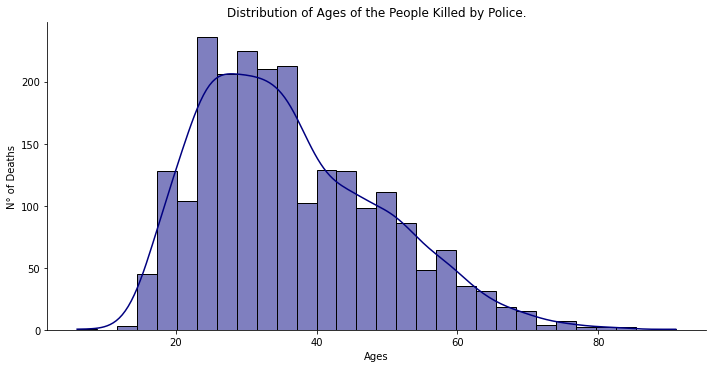

In [ ]:
sns.displot(df_fatalities, 
            x='age',
            bins=30, 
            aspect=2, 
            color='navy',
            kde=True)
plt.title('Distribution of Ages of the People Killed by Police.')
plt.xlabel('Ages')
plt.ylabel('N° of Deaths')
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

<font color="#FF657A">To get a more complete picture, we should look at how the age of winners change over Race. The box plot above looked at the dataset as a whole.</font>

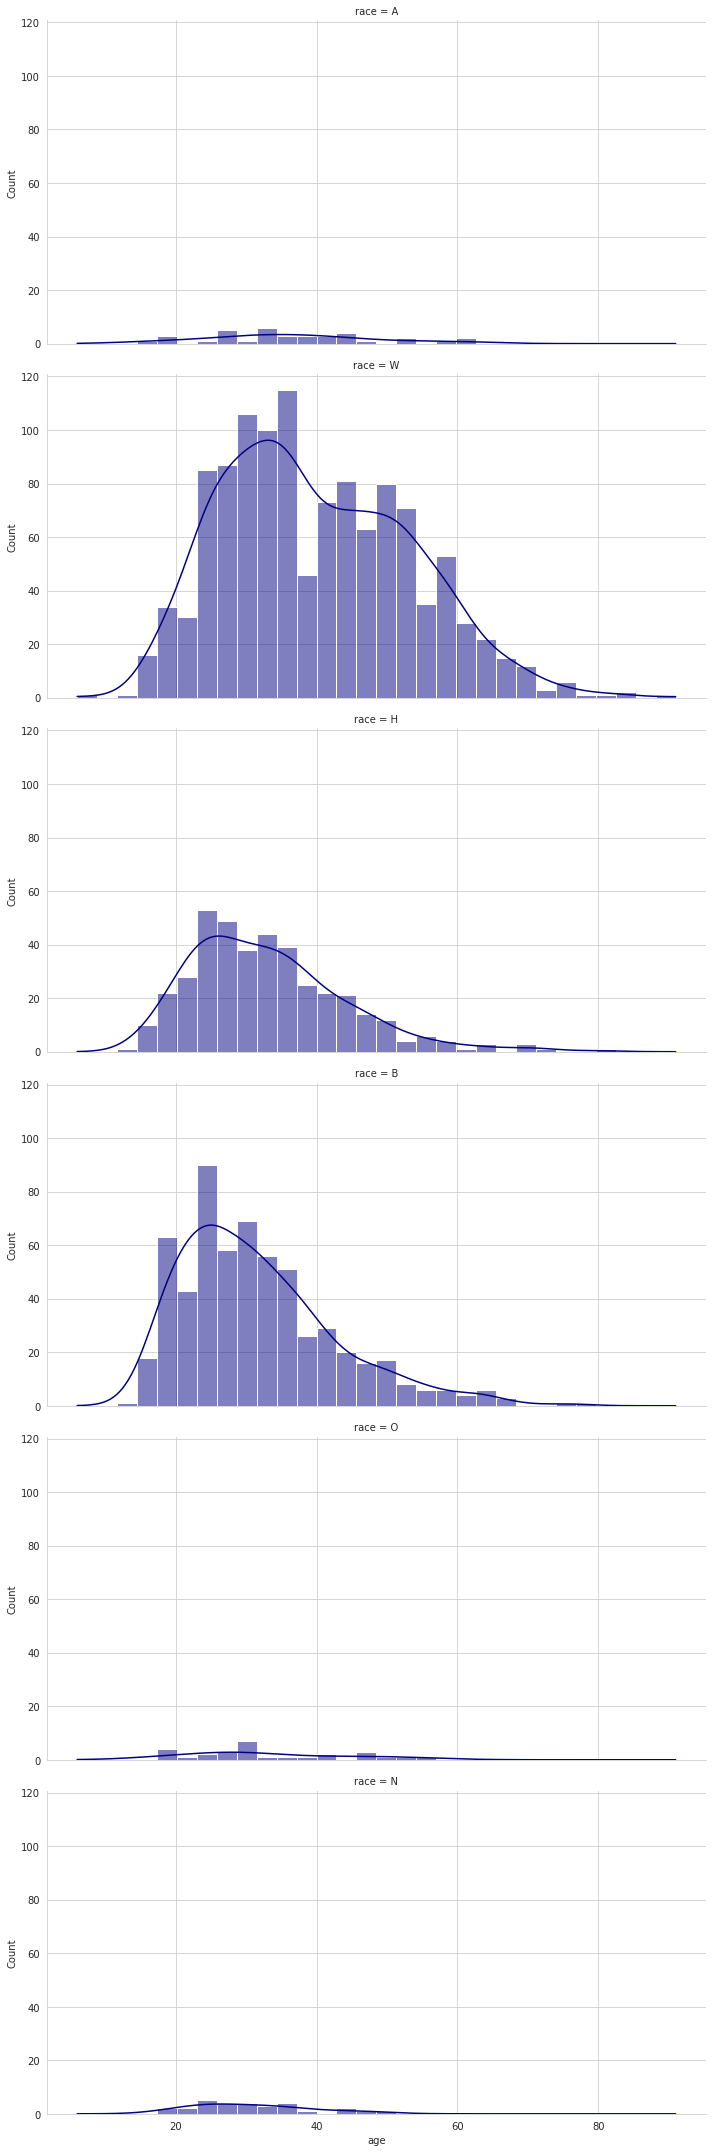

In [ ]:
with sns.axes_style('whitegrid'):
  sns.displot(df_fatalities, 
            x='age',
            bins=30, 
            aspect=2, 
            color='navy',
            row = 'race',
            kde=True)
 
plt.show()

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [ ]:
l_chart = px.bar(fatalities_by_race,
                  x='race', 
                  y='name',
                  color='name',
                  title='Total Number of People Killed by Race.',
                  labels={'name':'Deaths'},
                  )
 
l_chart.update_layout(xaxis_title='Race',
                    xaxis={'categoryorder':'min descending'},
                    yaxis_title='Total of Deaths')
 
l_chart.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
kills_mental_illness = df_fatalities.query('signs_of_mental_illness == True').signs_of_mental_illness.count() / df_fatalities.signs_of_mental_illness.count() * 100
print(f'Percentage of people killed with mental illness: {kills_mental_illness:.3}%')

Percentage of people killed with mental illness: 25.4%


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
city_Killings = df_fatalities.groupby(['state', 'city'], 
                               as_index=False).agg({'name': pd.Series.count})
city_Killings.sort_values(by='name', ascending=False, inplace=True)

In [ ]:
city_top10_killings = city_Killings.head(10)

In [ ]:
h_bar = px.bar(city_top10_killings,
               x = 'name',
               y = 'city',
               orientation='h',
               color='city',
               title="Top 10 Cities With the Most Police Killings.",
               color_discrete_sequence=px.colors.qualitative.Pastel
               )
 
h_bar.update_layout(xaxis_title='Number of Kills', yaxis_title='City')
# hiding legend 
h_bar.update_traces(showlegend=False)

h_bar.show()


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [ ]:
# Recovering dataframe with kills count by city an state.This allows us to get the top 10 cities for df_race_by_city.
city_top10_killings.head()

,state,city,name
188,CA,Los Angeles,35
83,AZ,Phoenix,28
1185,TX,Houston,23
495,IL,Chicago,22
892,NV,Las Vegas,17


In [ ]:
# Copy to preserve original datframe.
df_race_by_city_transformed = df_race_by_city.copy()

In [ ]:
#Rename columns,
df_race_by_city_transformed.rename(columns={'Geographic area' : 'state',
                                'City' : 'city',
                                'share_white':'White',
                                'share_black' : 'Black',
                                'share_native_american' :  'Native American',
                                'share_asian' : 'Asian',
                                'share_hispanic' : 'Hispanic'
                                }, inplace=True)

<font color='pink'>In order to pair dataframes and get the top 10 cities by race, we need to drop the "city" word from "city" rows. You can split your text by last space symbol into two parts using rsplit.</font>

In [ ]:
df_race_by_city_transformed["city"] = df_race_by_city_transformed.city.str.rsplit(' ', 1).str[0]
#df_race_by_city_transformed.head()

<font color="#FFC5A4">Convert columns into rows with Pandas. You can Unpivot a DataFrame from wide to long format with [pandas.melt](https://pandas.pydata.org/docs/reference/api/pandas.melt.html) </font>

In [ ]:
df_race_by_city_unpivoted = df_race_by_city_transformed.melt(id_vars=["state", "city"], 
                                  var_name="race", 
                                  value_name="percentaje", )
#df_race_by_city_unpivoted.head()

In [ ]:
#Merging both df allows us to obtain the race percentage for the top 10 cities.
merged_df_city_races = pd.merge(df_race_by_city_unpivoted, city_top10_killings, on=['state', 'city']).drop('name', axis=1)
merged_df_city_races.count()

state         50
city          50
race          50
percentaje    50
dtype: int64

In [ ]:
# Get death count by city and race. 
city_race_Killings = df_fatalities.groupby(['state','city', 'race'], 
                               as_index=False).agg({'name': pd.Series.count})

# Rename 'name' column.
city_race_Killings.rename(columns={'name' : 'deaths'}, inplace=True)
#city_race_Killings.head()

In [ ]:
# Replacing races names.
city_race_Killings.replace({'W':'White',
                                'B' : 'Black',
                                'N' :  'Native American',
                                'A' : 'Asian',
                                'H' : 'Hispanic',
                                'O' : 'Other'
                                }, inplace=True)
city_race_Killings.count()

state     1621
city      1621
race      1621
deaths    1621
dtype: int64

In [ ]:
# Fusion of death count and percentage of race dataframes. Races with no recorded kills will be completed with 0.
merged_df_city_kills_race = pd.merge(city_race_Killings, merged_df_city_races, how='right', on=['state', 'city', 'race']).fillna(0)
#merged_df_city_kills_race.head()

In [ ]:
merged_df_city_kills_race['kills_rate'] = merged_df_city_kills_race['deaths'] / merged_df_city_kills_race['percentaje'] * 100
#merged_df_city_kills_race.head()

In [ ]:
bar = px.bar(merged_df_city_kills_race, x ='city', 
             y ='kills_rate',
             color='race',)
bar.update_layout(title='Poverty Rate in each US State', xaxis_title='US State', xaxis={'categoryorder':'min ascending'}, 
                  yaxis_title='Poverty Rate', yaxis={'categoryorder':'min ascending'})


bar.show()

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [ ]:
state_Killings = city_Killings.groupby('state', as_index=False).agg({'name': pd.Series.count})
#state_Killings.head()

In [ ]:
map = px.choropleth(state_Killings, locations="state",
                    color='name', # lifeExp is a column of gapminder
                    title='Number of Murders by State',
                    labels={'name':'Total Deaths'},
                    locationmode="USA-states", 
                    scope="usa",
                    color_continuous_scale=px.colors.sequential.matter,)
 
map.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

We want to visualize posible trends along the dataframe.

In [ ]:
#Getting kills count by date.
Killings_Over_Time = df_fatalities.groupby('date', as_index=False).agg({'name': pd.Series.count})
Killings_Over_Time.head()

,date,name
0,2015-01-03,3
1,2015-01-04,2
2,2015-01-06,1
3,2015-01-07,2
4,2015-01-08,1


But plotting libraries don’t really plot human-readable dates, they convert dates to numbers, then change the xtick labels so that they’re human readable. This means that if you want to plot something on top of dates, it’s quite confusing.


To fix this, we need to convert the datetime labels to their ordinal (numeric) representation. There are a number of ways to convert dates to numbers. Fortunately, Matplotlib has a convenience function to convert datetime objects to their numeric representation.



In [ ]:
from matplotlib.dates import date2num
Killings_Over_Time['date_ord'] = Killings_Over_Time['date'].map(lambda a: date2num(a))
Killings_Over_Time.head()

,date,name,date_ord
0,2015-01-03,3,"735,601.00"
1,2015-01-04,2,"735,602.00"
2,2015-01-06,1,"735,604.00"
3,2015-01-07,2,"735,605.00"
4,2015-01-08,1,"735,606.00"


Now that we have its numerical representation, we can make a plot with the ordinals on the date axis.

[]

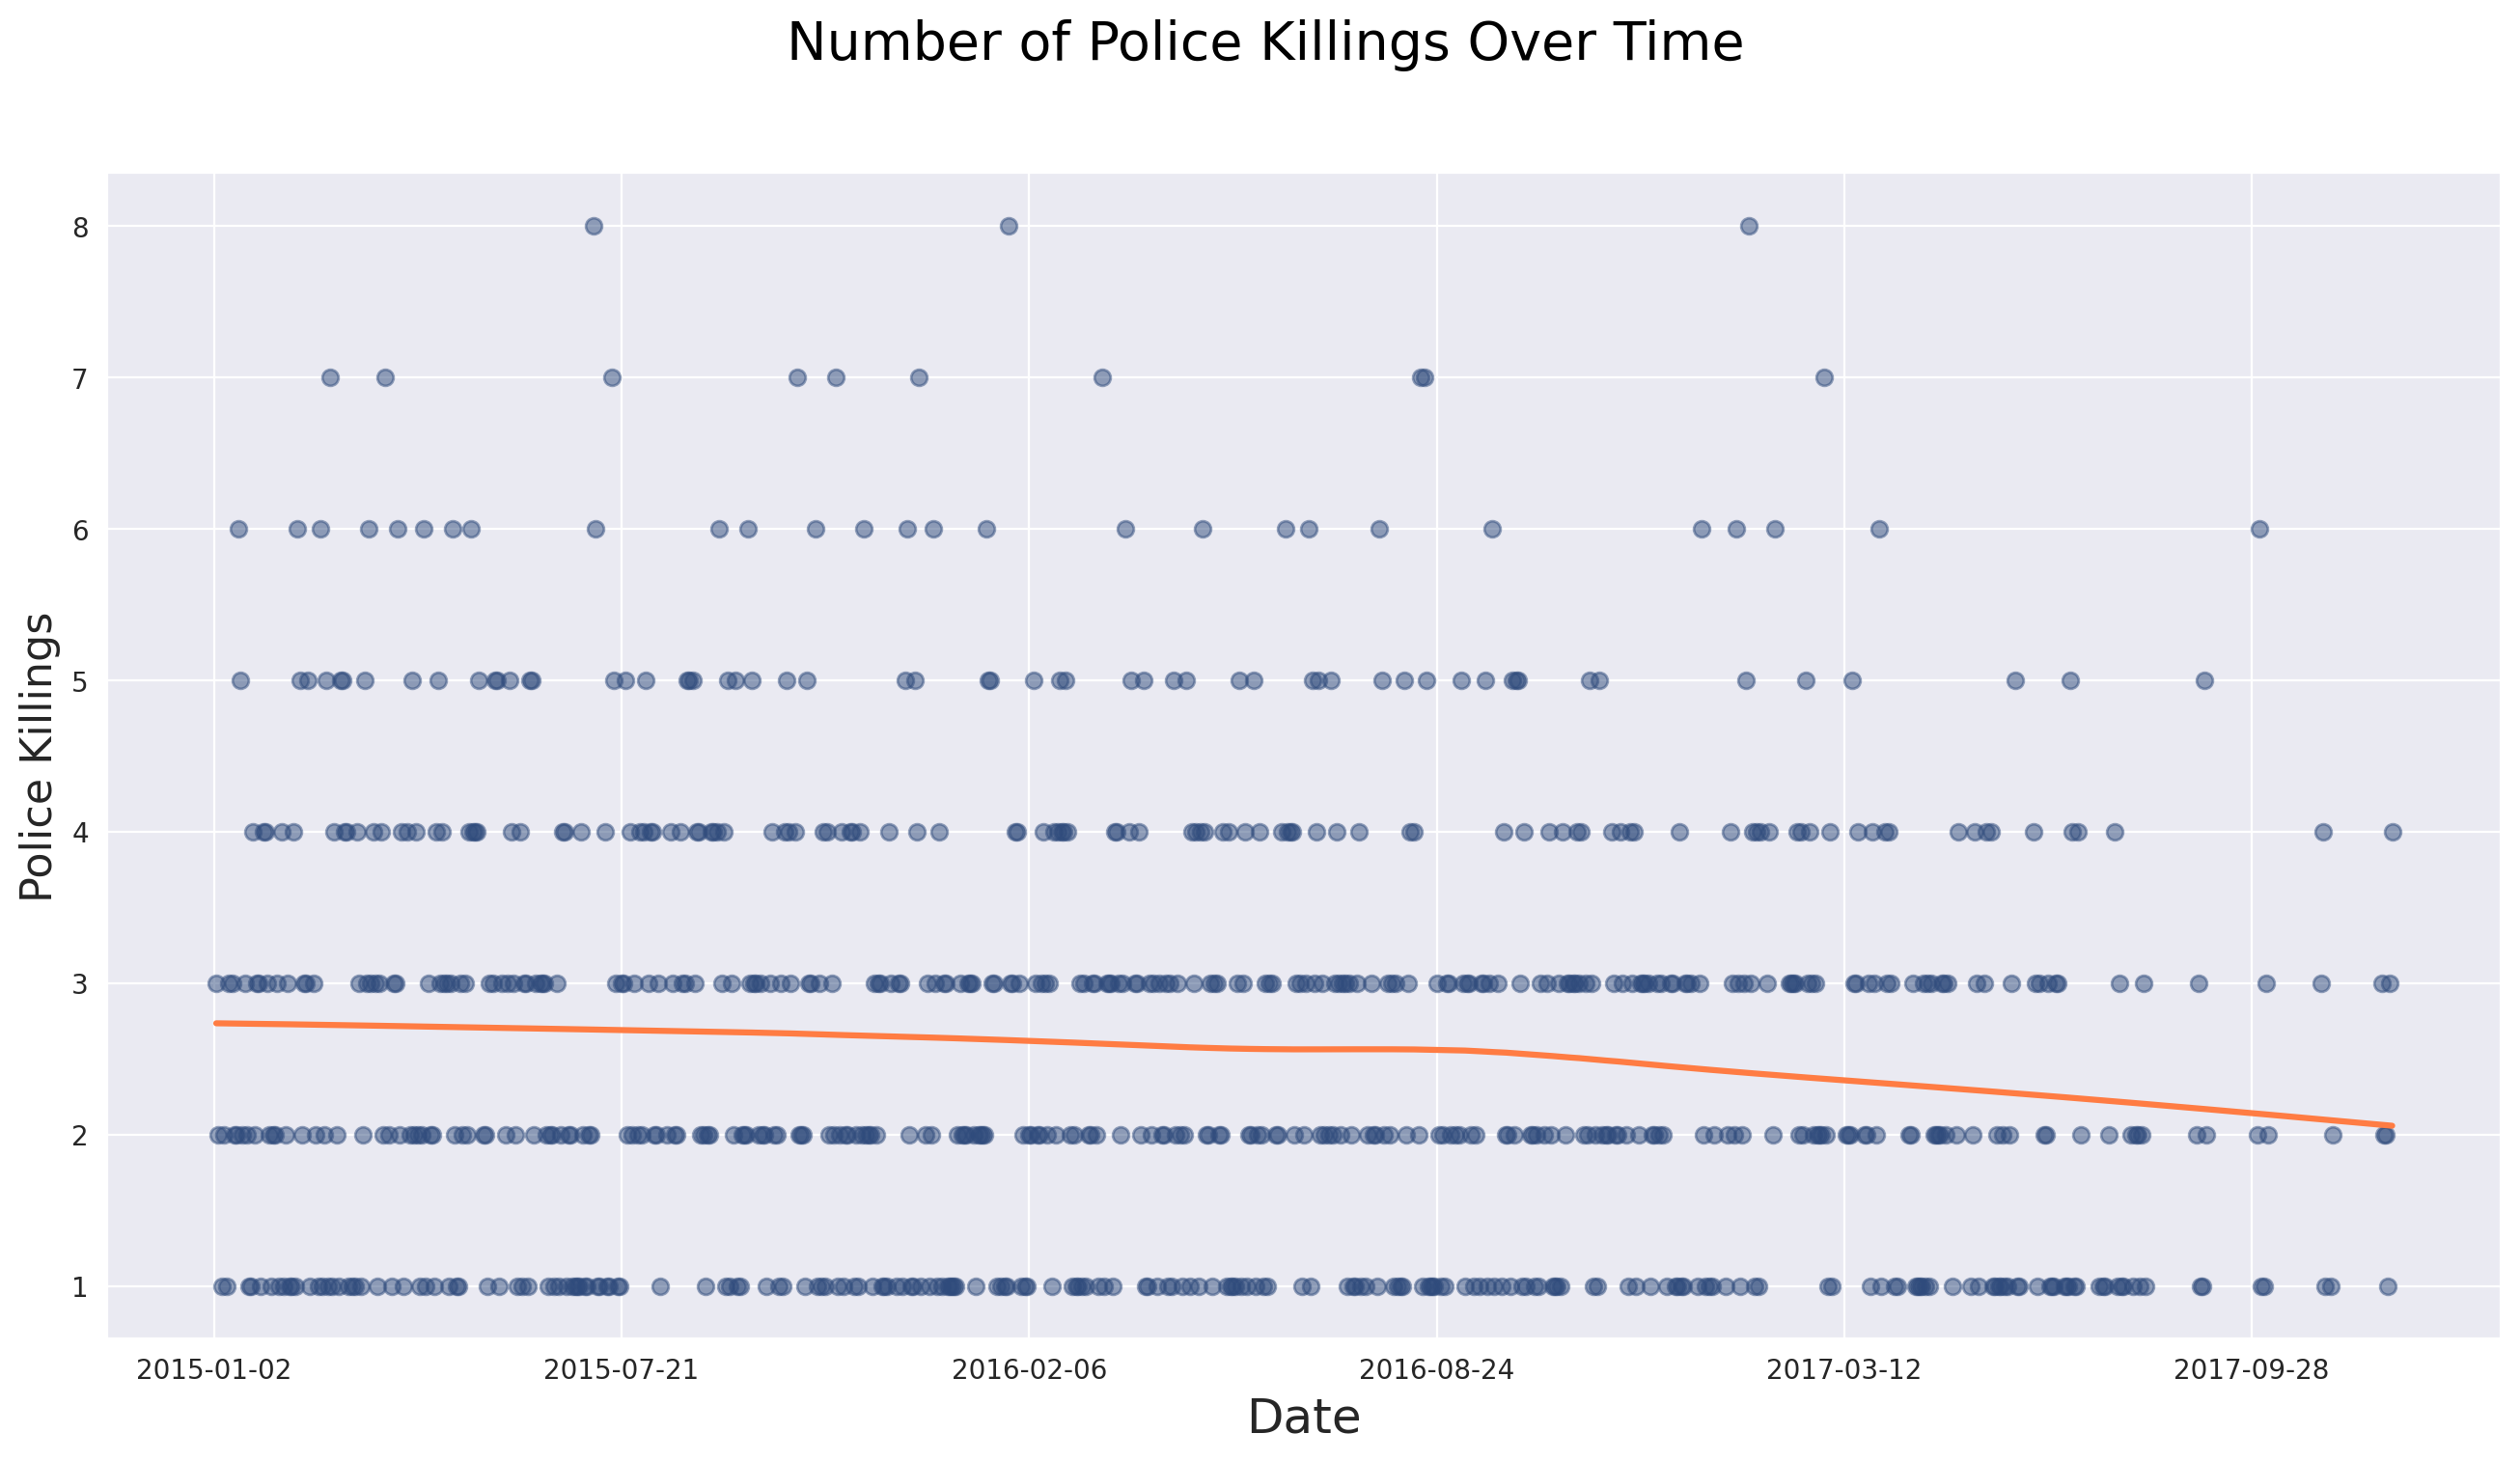

In [ ]:
from datetime import date
plt.figure(figsize=(16,8), dpi=200)
with sns.axes_style("darkgrid"):
  ax = sns.regplot(data=Killings_Over_Time, 
            x='date_ord', 
            y='name',
            lowess=True,
            scatter_kws = {'alpha': 0.5, 
                           'color': '#2f4b7c'},
            line_kws = {'color': '#ff7c43'})
  
  #Replace the ordinal X-axis labels with nice, readable dates
  ax.set_xlabel('date')
  new_labels = [date.fromordinal(int(item)) for item in ax.get_xticks()]
  ax.set_xticklabels(new_labels)

plt.suptitle('Number of Police Killings Over Time', fontsize=20)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Police Killings', fontsize=16)

plt.plot()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).